<a href="https://colab.research.google.com/github/Alirs2002/x_ray_pneumonia_detector/blob/main/src_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this project ,my goal is to use the CNN model to classify people

i know i am the superman

i will save peoples lives:))

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [5]:
import zipfile

In [2]:
!wget -cq https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip


In [3]:
!ls

ChestXRay2017.zip  sample_data


In [6]:
zip = zipfile.ZipFile("ChestXRay2017.zip","r")

In [7]:
zip.extractall()


In [8]:
zip.close()

In [9]:
!ls ./chest_xray/train/NORMAL

IM-0115-0001.jpeg	IM-0620-0001.jpeg		NORMAL2-IM-0839-0001.jpeg
IM-0117-0001.jpeg	IM-0621-0001.jpeg		NORMAL2-IM-0840-0001.jpeg
IM-0119-0001.jpeg	IM-0622-0001-0001.jpeg		NORMAL2-IM-0841-0001.jpeg
IM-0122-0001.jpeg	IM-0622-0001-0002.jpeg		NORMAL2-IM-0842-0001.jpeg
IM-0125-0001.jpeg	IM-0622-0001.jpeg		NORMAL2-IM-0843-0001.jpeg
IM-0127-0001.jpeg	IM-0623-0001.jpeg		NORMAL2-IM-0845-0001.jpeg
IM-0128-0001.jpeg	IM-0624-0001-0002.jpeg		NORMAL2-IM-0846-0001.jpeg
IM-0129-0001.jpeg	IM-0624-0001.jpeg		NORMAL2-IM-0847-0001.jpeg
IM-0131-0001.jpeg	IM-0625-0001.jpeg		NORMAL2-IM-0848-0001.jpeg
IM-0133-0001.jpeg	IM-0626-0001-0001.jpeg		NORMAL2-IM-0849-0001.jpeg
IM-0135-0001.jpeg	IM-0626-0001-0002.jpeg		NORMAL2-IM-0851-0001-0001.jpeg
IM-0137-0001.jpeg	IM-0627-0001.jpeg		NORMAL2-IM-0851-0001-0002.jpeg
IM-0140-0001.jpeg	IM-0628-0001.jpeg		NORMAL2-IM-0851-0001.jpeg
IM-0141-0001.jpeg	IM-0629-0001-0001.jpeg		NORMAL2-IM-0852-0001.jpeg
IM-0143-0001.jpeg	IM-0629-0001-0002.jpeg		NORMAL2-IM-0853-0001.jpeg
IM-0145-00

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


let's define our dataset's path

In [11]:
train_data_normal_path = "./chest_xray/train/NORMAL/"
train_data_pneumonia_path = "./chest_xray/train/PNEUMONIA/"

test_data_normal_path = "./chest_xray/test/NORMAL/"
test_data_pneumonia_path = "./chest_ray/test/PNEUMONIA/"

now,lets create a function to plot a random image from a desired directory

In [12]:
import random
import matplotlib.image as mpimg
import os

def show_random(target_folder):

    folder = target_folder

    random_image = random.sample(os.listdir(folder),1)

    zaza = mpimg.imread(folder+"/"+random_image[0])

    #zaza = np.expand_dims(zaza,axis=-1)
    plt.imshow(zaza,cmap="gray")
    print(zaza.shape)
    #plt.figure(figsize=(10,10))
    #plt.imshow(random_image)
    plt.axis(False)



(1442, 1604)


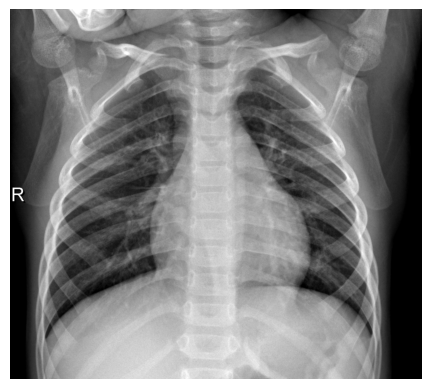

In [13]:
show_random(train_data_normal_path)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(85)

In [15]:
train_data_path = "./chest_xray/train/"
test_data_path = "./chest_xray/test/"

In [16]:
train_data_gen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
test_data_gen = ImageDataGenerator(rescale=1./255.,featurewise_center=True)


In [17]:
train_data = train_data_gen.flow_from_directory(train_data_path,
                                                batch_size=32,
                                                target_size = (224,224),
                                                class_mode="binary",
                                                seed = 85)

test_data = test_data_gen.flow_from_directory(test_data_path,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=85)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
type(train_data)

keras.src.preprocessing.image.DirectoryIterator

In [19]:
type(train_data)

keras.src.preprocessing.image.DirectoryIterator

we have created dataset fpor training our model

now lets create our CNN model

In [20]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2
                                  ,activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"))

model1.add(tf.keras.layers.Conv2D(filters=128,
                                  kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=2,
                                  activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                     padding="valid"))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu))
model1.add(tf.keras.layers.Dense(16,activation=tf.keras.activations.relu))

model1.add(tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid))


In [21]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=[tf.keras.metrics.BinaryAccuracy()])


In [22]:
history= model1.fit(train_data,
           validation_data=test_data,
           epochs=8,
           verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/8
164/164 - 68s - loss: 0.2946 - binary_accuracy: 0.8742 - val_loss: 0.6787 - val_binary_accuracy: 0.7788 - 68s/epoch - 417ms/step
Epoch 2/8
164/164 - 58s - loss: 0.0922 - binary_accuracy: 0.9652 - val_loss: 1.2893 - val_binary_accuracy: 0.7147 - 58s/epoch - 355ms/step
Epoch 3/8
164/164 - 57s - loss: 0.0687 - binary_accuracy: 0.9738 - val_loss: 1.2080 - val_binary_accuracy: 0.7420 - 57s/epoch - 347ms/step
Epoch 4/8
164/164 - 57s - loss: 0.0554 - binary_accuracy: 0.9790 - val_loss: 1.9459 - val_binary_accuracy: 0.7099 - 57s/epoch - 345ms/step
Epoch 5/8
164/164 - 70s - loss: 0.0357 - binary_accuracy: 0.9874 - val_loss: 2.1563 - val_binary_accuracy: 0.7003 - 70s/epoch - 427ms/step
Epoch 6/8
164/164 - 64s - loss: 0.0224 - binary_accuracy: 0.9924 - val_loss: 2.1038 - val_binary_accuracy: 0.7196 - 64s/epoch - 388ms/step
Epoch 7/8
164/164 - 73s - loss: 0.0116 - binary_accuracy: 0.9962 - val_loss: 2.1854 - val_binary_accuracy: 0.7468 - 73s/epoch - 444ms/step
Epoch 8/8
164/164 - 70s - l

In [23]:
model1.evaluate(test_data)

20/20 [==============================] - 7s 356ms/step - loss: 1.8321 - binary_accuracy: 0.7516


[1.8321045637130737, 0.7516025900840759]

as we can see,we have a giant overfit

we can do some operations to improve our performance on the test data

<Axes: >

<Figure size 1000x1000 with 0 Axes>

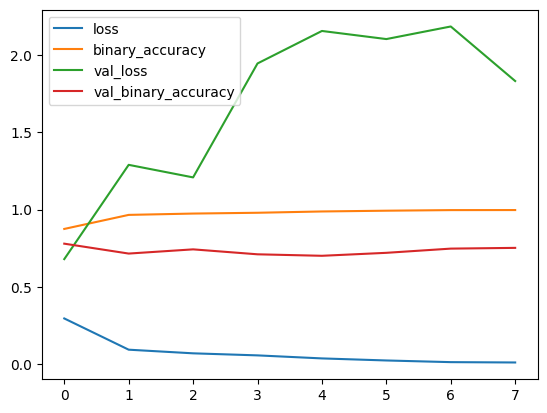

In [24]:
plt.figure(figsize=(10,10))
pd.DataFrame(history.history).plot()

as we can see it is better to use transfer learning to improve the accuracy

In [30]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-30:]:
  layer.trainable = True

x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='linear')(x)

model_2 = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ['accuracy'])


history_2 = model_2.fit(train_data,
                    validation_data=test_data,
                    epochs=10)

Epoch 1/10
164/164 [==============================] - 86s 444ms/step - loss: 7721650225152.0000 - accuracy: 0.6651 - val_loss: 0.6892 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 68s 413ms/step - loss: 0.5718 - accuracy: 0.7422 - val_loss: 0.7039 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 68s 416ms/step - loss: 0.5718 - accuracy: 0.7422 - val_loss: 0.6975 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 67s 409ms/step - loss: 0.5712 - accuracy: 0.7422 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 73s 443ms/step - loss: 0.5714 - accuracy: 0.7422 - val_loss: 0.6777 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 67s 409ms/step - loss: 0.5716 - accuracy: 0.7422 - val_loss: 0.7002 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 69s 417ms/step - loss: 0.5721 - accuracy: 0.7422 - val_loss: 0.6

In [32]:
model1.save("model_1.h5")